In [55]:
from DataGenerationAndManagementClass import DataGenerationAndManagementClass

# 实例化数据生成与管理类
data_generator = DataGenerationAndManagementClass()

# 示例：生成某股票的历史数据并保存为CSV文件
# 训练数据
stock_symbol = "AAPL"  # 这里以苹果公司股票代码示例，可替换为其他股票代码
start_date = "2019-02-01"  # 开始日期，可按需修改
end_date = "2024-01-15"  # 结束日期，可按需修改
generated_stock_data = data_generator.generate_stock_data(stock_symbol, start_date, end_date)
file_path = "train_stock_data.csv"  # CSV文件保存路径，可按需修改
data_generator.save_data_to_csv(generated_stock_data, file_path)

# 测试数据
stock_symbol = "AAPL"  # 这里以苹果公司股票代码示例，可替换为其他股票代码
start_date = "2024-02-15"  # 开始日期，可按需修改
end_date = "2024-12-15"  # 结束日期，可按需修改
generated_stock_data = data_generator.generate_stock_data(stock_symbol, start_date, end_date)
file_path = "test_stock_data.csv"  # CSV文件保存路径，可按需修改
data_generator.save_data_to_csv(generated_stock_data, file_path)

True

In [60]:
from sklearn.model_selection import train_test_split
from stable_baselines3 import DQN
from stable_baselines3 import PPO
from StockTradingEnv import StockTradingEnv
import pandas as pd
import numpy as np

# 加载数据
train_data = pd.read_csv('train_stock_data.csv') # 股票历史数据，包含开盘价、收盘价等
train_data = train_data.drop(columns=['Date', 'Index'])

test_data = pd.read_csv('test_stock_data.csv') # 股票历史数据，包含开盘价、收盘价等
test_data = test_data.drop(columns=['Date', 'Index'])


# 创建训练环境和测试环境
train_env = StockTradingEnv(train_data)
test_env = StockTradingEnv(test_data)

# 创建环境
# train_env = StockTradingEnv(data)

In [61]:
# 训练 DQN
model = DQN("MlpPolicy",
            train_env,
            verbose=1,
            policy_kwargs={'net_arch': [64, 32, 10]},
            learning_rate=0.0001,
            exploration_fraction=0.3,
            exploration_initial_eps=0.5,
            exploration_final_eps=0.1
            )
# model = PPO('MlpPolicy', train_env, verbose=1)
model.learn(total_timesteps=50000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


d:\ANACONDA\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.81e+03 |
|    ep_rew_mean      | 5.64e+05 |
|    exploration_rate | 0.307    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 592      |
|    time_elapsed     | 12       |
|    total_timesteps  | 7236     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.5e+03  |
|    n_updates        | 1783     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.81e+03 |
|    ep_rew_mean      | 7.95e+05 |
|    exploration_rate | 0.114    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 595      |
|    time_elapsed     | 24       |
|    total_timesteps  | 14472    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 399      |
|    n_updates      

In [57]:
# 测试智能体
obs = test_env.reset()
d = {0: '买入', 1: '卖出', 2: '持有'}
profit = []
days = 100
for i in range(days):
    action, _states = model.predict(obs, deterministic=True)
    print(f'action = {d[action.item()]}')
    obs, reward, done, info = test_env.step(action)
    profit.append(info['total_asset'] - 10000) # 这里硬编码了初始金额
    print(info)
    print(f'reward = {reward}')
    print()
    if done:
        days = i
        break

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 10000.0}
reward = 0.0

action = 持有
{'total_asset': 100

Final Profit: 0.0


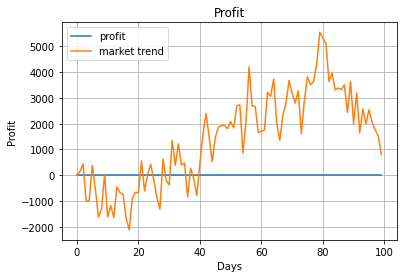

In [58]:
def maxProfit(prices, balance):
    ans = [0]
    left = 0
    right = 1
    while right < len(prices):
        if prices[right] > prices[left]:
            ans.append(prices[right] - prices[right-1] + ans[-1])   
        else:
            ans.append(ans[-1])
        left += 1
        right += 1
    for i in range(len(ans)):
        ans[i] = ans[i] * balance
    return ans

def avgProfit(prices, balance):
    ans = [0]
    left = 0
    right = 1
    num = balance / prices[0]
    while right < len(prices):
        ans.append(prices[right] - prices[right-1] + ans[-1])   
        left += 1
        right += 1
    for i in range(len(ans)):
        ans[i] = ans[i] * num
    
    return ans

prices = list(pd.read_csv('test_stock_data.csv')['Close'])[:days]

import matplotlib.pyplot as plt

# 创建折线图
plt.plot([i for i in range(days)], profit, label='profit')
print(f"Final Profit: {profit[-1]}")
# plt.plot([i for i in range(days)], maxProfit(prices, 10000))
plt.plot([i for i in range(days)], avgProfit(prices, 10000), label='market trend')
plt.grid(True)

# 添加标题
plt.title("Profit")

# 添加X轴和Y轴标签
plt.xlabel("Days")
plt.ylabel("Profit")
plt.legend()
plt.show()

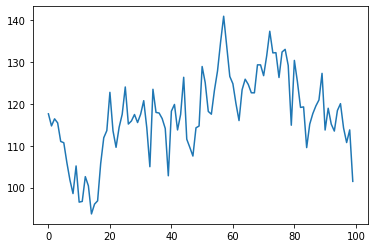

In [54]:
plt.plot([i for i in range(days)], prices)